In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
import os
from google.colab import files
uploaded = files.upload()

Saving atlantic_cleaned2.0.csv to atlantic_cleaned2.0.csv


In [ ]:
df = pd.read_csv("atlantic_cleaned2.0.csv")

In [ ]:
df.head()

,id,name,date,status_of_system,latitude,longitude,maximum_sustained_wind_knots,maximum_pressure,34_kt_ne,34_kt_se,34_kt_sw,34_kt_nw,50_kt_ne,50_kt_se,50_kt_sw,50_kt_nw,64_kt_ne,64_kt_se,64_kt_sw,64_kt_nw
0,AL012004,ALEX,7/31/2004 18:00,TD,30.3,-78.3,25,1010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AL012004,ALEX,8/1/2004 0:00,TD,31.0,-78.8,25,1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AL012004,ALEX,8/1/2004 6:00,TD,31.5,-79.0,25,1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AL012004,ALEX,8/1/2004 12:00,TD,31.6,-79.1,30,1009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AL012004,ALEX,8/1/2004 18:00,TS,31.6,-79.2,35,1009,0.0,50.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


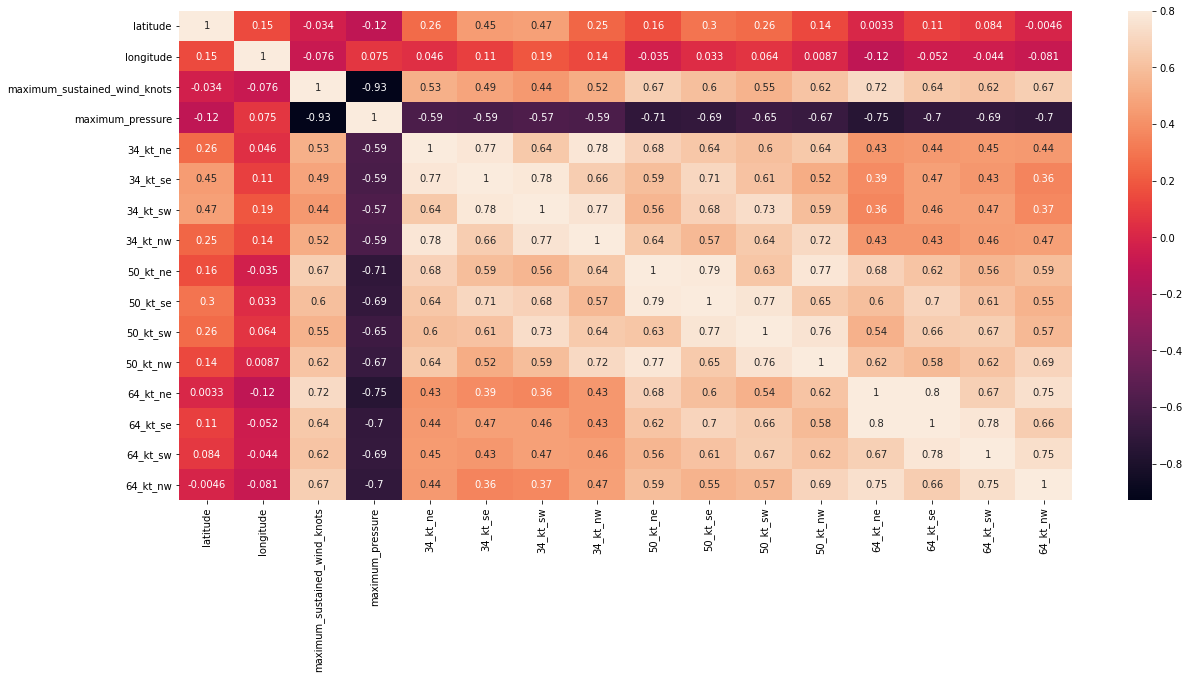

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

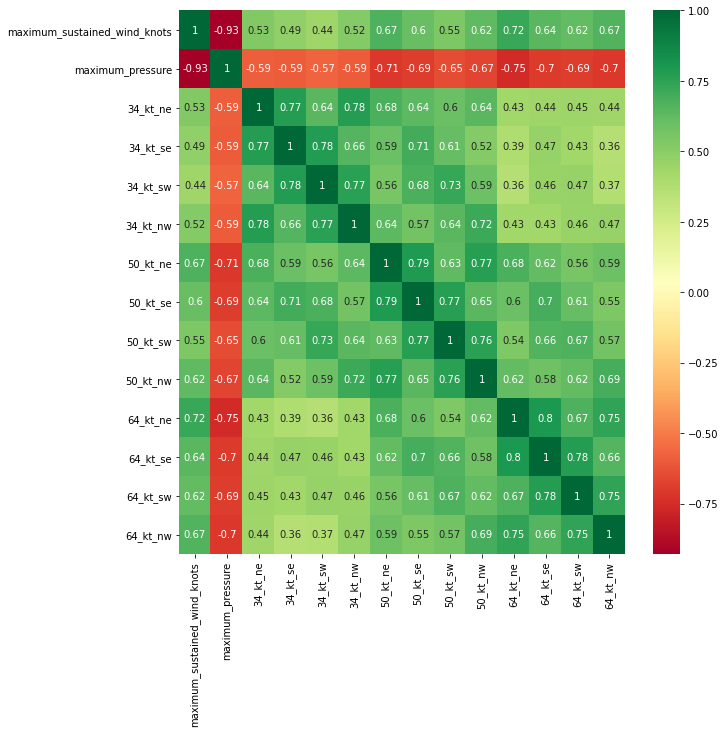

In [ ]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["maximum_sustained_wind_knots"])>0.25]
plt.figure(figsize=(10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
df.columns
winds = ['64_kt_ne', '64_kt_se',
       '64_kt_sw', '64_kt_nw']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


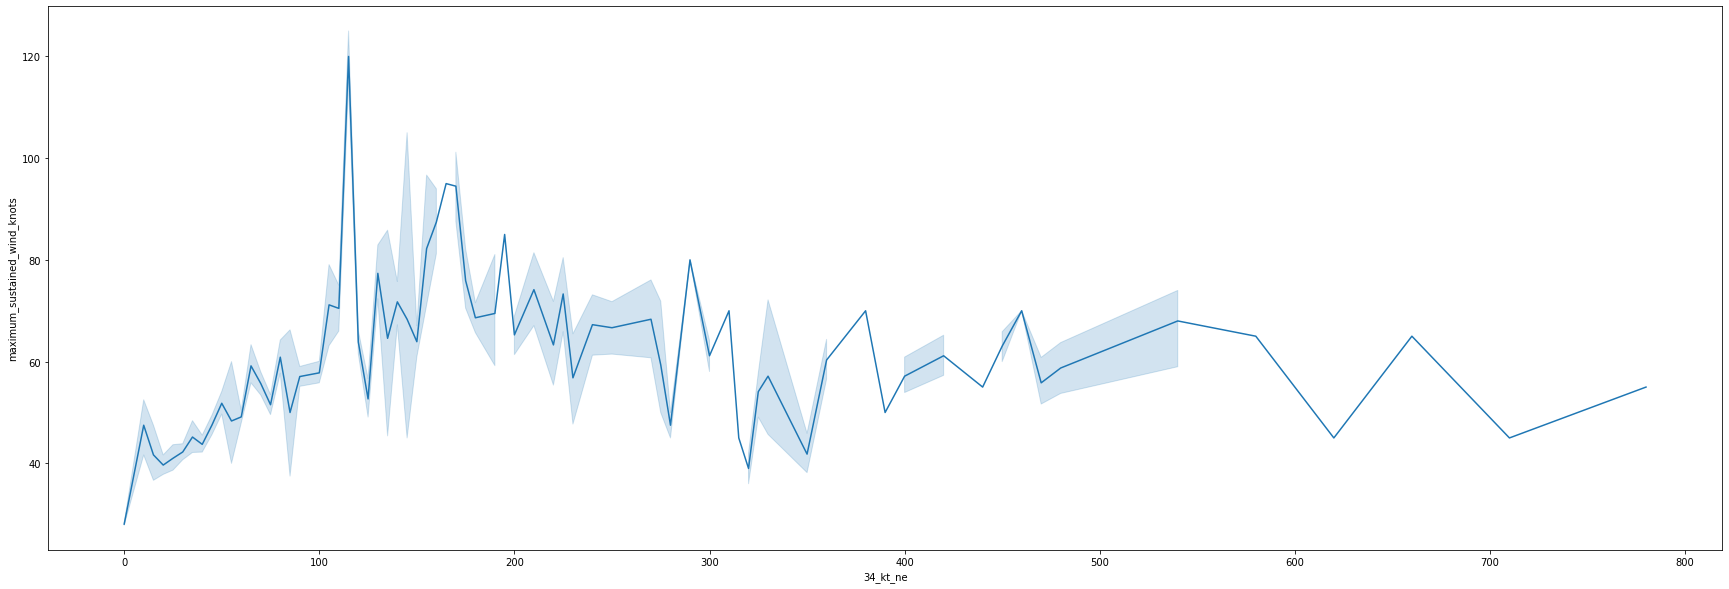

In [ ]:
##Line Graph comparing winds at 64 knots
plt.figure(figsize=(30, 10))
sns.lineplot(x = df["34_kt_ne"], y = df["maximum_sustained_wind_knots"])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


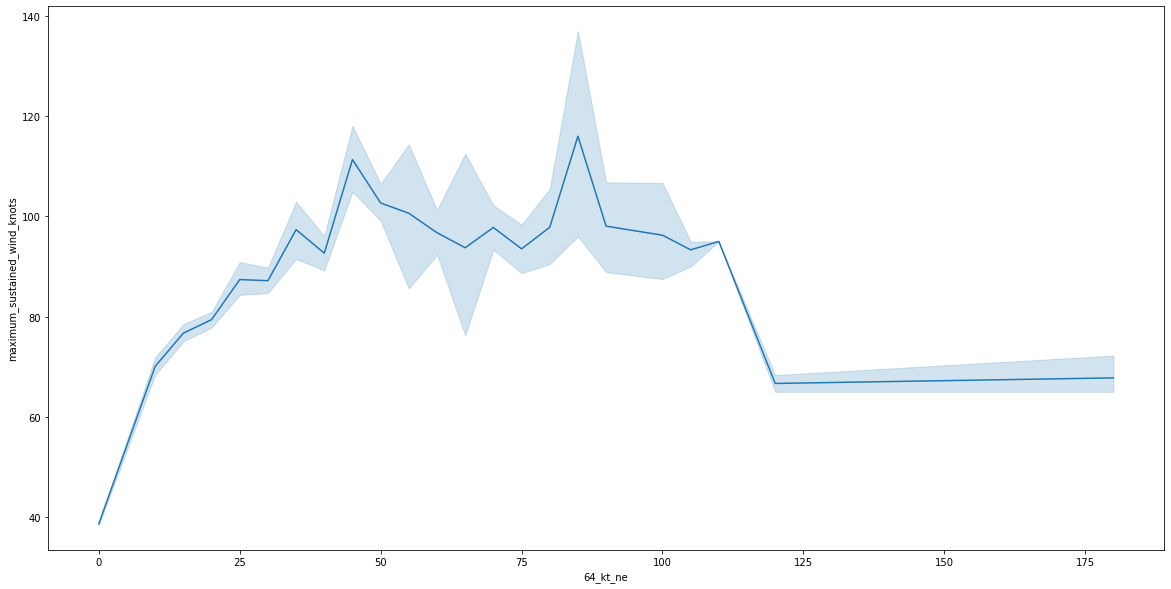

In [ ]:
#Line Graph comparing winds at 64 knots
plt.figure(figsize=(20, 10))
sns.lineplot(x = df['64_kt_ne'], y = df["maximum_sustained_wind_knots"])


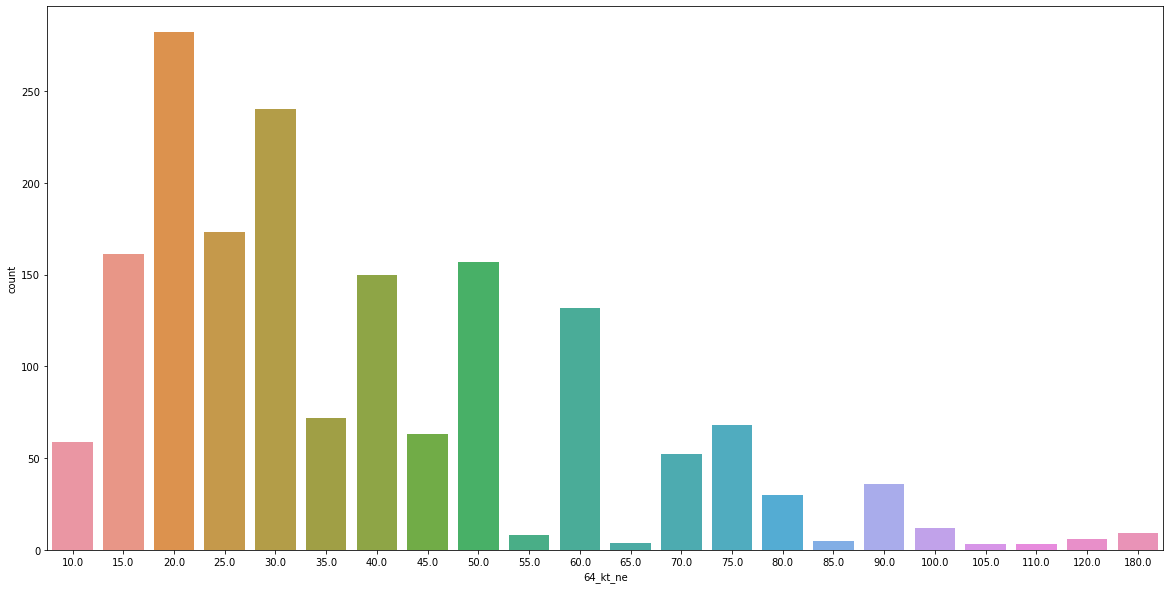

In [ ]:
#Eliminating 0 values for accuracy
plt.figure(figsize=(20, 10))
sns.countplot(x = df['64_kt_ne'].replace(to_replace=0, value=np.nan) )

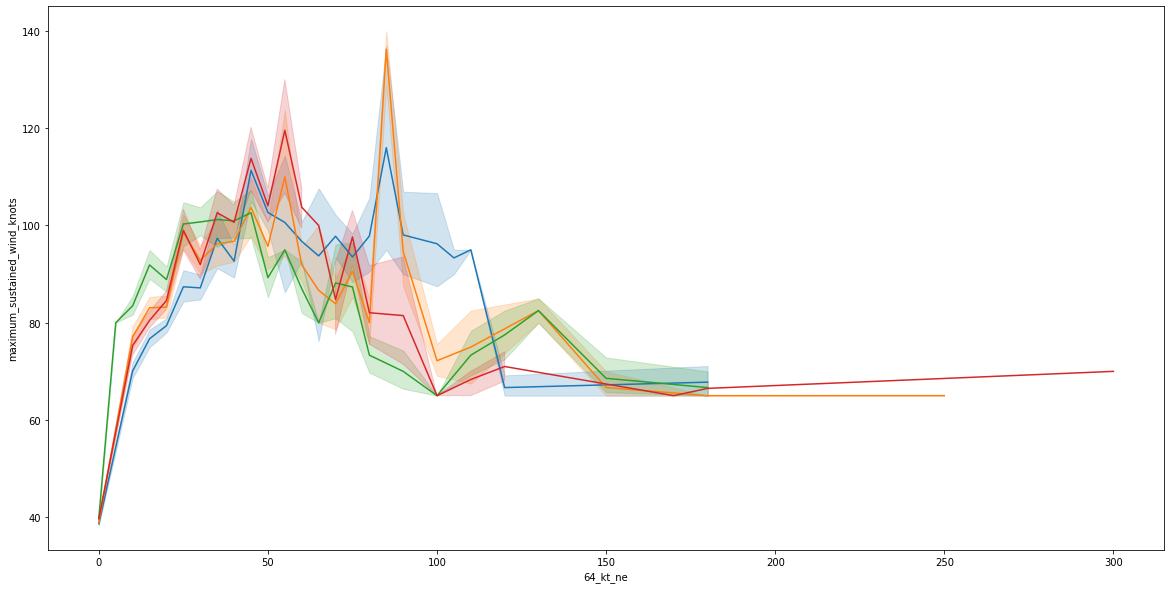

In [ ]:
#Overall evaluation for all winds
plt.figure(figsize=(20, 10))
for i in winds:
  sns.lineplot(x = df[i],y = df["maximum_sustained_wind_knots"])


In [ ]:
#Hence, we can conclude that there is a strong correlation between the wind speeds and the sustained wind. 
#Thus maximum_sustained_wind_speed shall be the target for the model